In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [73]:
df=pd.read_csv('heart.csv')
df = df.dropna()
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [74]:
from sklearn.preprocessing import MinMaxScaler
Xn = df.drop("sex", axis = 1).drop("cp", axis = 1).drop("fbs", axis = 1).drop("restecg", axis = 1).drop("exang", axis = 1).drop("target", axis = 1).drop("slope", axis = 1).drop("ca", axis = 1).drop("thal", axis = 1)
df = df.drop("age", axis = 1).drop("trestbps", axis = 1).drop("chol", axis = 1).drop("thalach", axis = 1).drop("oldpeak", axis = 1)

print(Xn.head(5), "\n")
print(df.head(5), "\n")

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(Xn)

# Нормализация

from sklearn import preprocessing

X_normalized = preprocessing.normalize(X_train_minmax, norm='l2')
#frame = pd.DataFrame(X_normalized)
frame = pd.DataFrame(X_normalized, columns = ['age','trestbps','chol','thalach','oldpeak'])
print(frame.head(5), "\n")

df = pd.concat([df,frame], axis=1)

print(df.head(5), "\n")

   age  trestbps  chol  thalach  oldpeak
0   52       125   212      168      1.0
1   53       140   203      155      3.1
2   70       145   174      125      2.6
3   61       148   203      161      0.0
4   62       138   294      106      1.9 

   sex  cp  fbs  restecg  exang  slope  ca  thal  target
0    1   0    0        1      0      2   2     3       0
1    1   0    1        0      1      0   0     3       0
2    1   0    0        1      1      0   0     3       0
3    1   0    0        1      0      2   1     3       0
4    0   0    1        1      0      1   3     2       0 

        age  trestbps      chol   thalach   oldpeak
0  0.497415  0.303590  0.203825  0.768657  0.167433
1  0.470279  0.408166  0.165349  0.603105  0.470279
2  0.743773  0.418950  0.095426  0.358939  0.365157
3  0.606845  0.463721  0.160024  0.625375  0.000000
4  0.702638  0.424234  0.392007  0.273059  0.313199 

   sex  cp  fbs  restecg  exang  slope  ca  thal  target       age  trestbps  \
0    1   0    

In [75]:
# #df['Категория'] = pd.cut(df['target'], bins=[0, 4, 7], labels=[0, 1]).astype(int)
# #df


# df['Категория'] = pd.cut(df['target'], bins=[0, 4, 7], labels=[0, 1]).astype(int)
# from sklearn import preprocessing
# X_train = df.iloc[:,:4]
# X_normalized = preprocessing.normalize(X_train, norm='l2')
# frame = pd.DataFrame(X_normalized, columns = ['Engine_Size','Cylinders','Fuel_Consumption_in_City(L/100 km)','Fuel_Consumption_in_City_Hwy(L/100 km)'])
# frame['target'] = df['target']
# frame['Категория'] = df['Категория']

# df = frame
# df.head(5)

In [76]:
x_y = df[['oldpeak', 'target']]
x_y

,oldpeak,target
0,0.167433,0
1,0.470279,0
2,0.365157,0
3,0.000000,0
4,0.313199,0
...,...,...
1020,0.000000,1
1021,0.433975,0
1022,0.244866,0
1023,0.000000,1


In [77]:
new_ind = np.arange(100)
np.random.shuffle(new_ind)
new_ind #

array([58, 97, 71, 90, 50, 48, 28, 74, 76, 93, 55, 64, 94, 37, 99, 31, 70,
       25, 87, 62, 34, 29, 33, 80,  9, 92,  6, 42, 38, 84, 77, 86, 81, 36,
       59, 41, 63,  8, 83, 49, 52, 79, 89, 44, 65, 21, 69, 26, 40,  2, 20,
       47,  7, 45,  0, 73, 57, 13, 95, 24, 46, 67,  3, 82, 88, 32, 11, 15,
       14, 43, 12, 56, 18, 30, 72, 16, 10, 60, 75,  1, 17, 98, 23, 27, 35,
       96, 22, 68, 51, 19,  4, 78, 54, 66,  5, 91, 39, 61, 85, 53])

In [78]:
train_idx = new_ind[:170]
test_idx = new_ind[170:]

In [79]:
x_y_train = x_y.iloc[train_idx]

In [80]:
x_y_train.boxplot(column=['oldpeak'])

<Axes: >

In [81]:
# используя эти индексы разделим массивы данных на обучающие и тестовые
x_train, y_train = x_y_train['oldpeak'], x_y_train['target']# обучающие вход и желаемый выход
x_test, y_test = x_y['oldpeak'][test_idx], x_y['target'][test_idx]# тестовые вход и желаемый выход

In [82]:
# plt_my('scatter', x_train, y_train, color='green') # рисуем обучающие данные, зависимость желаемого выхода от входа
# #plt.scatter(x_test, y_test,  color='green')
# plt.show()

## Обучение

### Гиперпараметры

In [83]:
lr = 1e-3 # шаг обучения
epochs = 3500 # количество эпох

In [84]:
a =  np.random.randn(1) # случайное число для параметра a
a

array([-0.97292734])

In [85]:
b = np.random.rand(1) # случайное число для параметра b
b

array([0.52411686])

In [86]:
# ЦИКЛ ОБУЧЕНИЯ
Loss=[]# массив для значений функции ошибки
for ep in range(epochs): # в цикле по количеству эпох
    y_pred = b + a*x_train # считаем выход модели для всех примеров входов с текущими значениями параметров модели
    error = (y_pred - y_train) # считаем разницу между полученным выходом и тем, который должен был быть

    loss = (error**2).mean() # считаем суммарную ошибку. Функция среднего mean() как замена суммирования по всем примерам
    Loss.append(loss) # добавлем текущее значение в массив
    b_grad = 2 * error.mean() # считаем производную по параметру, смещению b (на 2 можно не умножать включив его в lr)
    a_grad = 2 * (x_train * error).mean() # считаем производную по параметру, множителю a

    # обучение = изменение параметров
    a = a - lr*a_grad # изменяем параметр a
    b = b - lr*b_grad # изменяем параметр b

    if ep % 20 == 0 or ep==epochs-1: # каждые 20 эпох будем
        print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b)) # печатать значение функции ошибки

ep:   0  loss: 0.206610   a=-0.973  b=0.524
ep:  20  loss: 0.205044   a=-0.972  b=0.530
ep:  40  loss: 0.203602   a=-0.972  b=0.535


/tmp/ipykernel_37073/282680933.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b)) # печатать значение функции ошибки


ep:  60  loss: 0.202275   a=-0.971  b=0.540
ep:  80  loss: 0.201053   a=-0.970  b=0.545
ep: 100  loss: 0.199929   a=-0.970  b=0.550
ep: 120  loss: 0.198893   a=-0.969  b=0.555
ep: 140  loss: 0.197940   a=-0.969  b=0.559
ep: 160  loss: 0.197062   a=-0.969  b=0.563
ep: 180  loss: 0.196253   a=-0.968  b=0.567
ep: 200  loss: 0.195509   a=-0.968  b=0.571
ep: 220  loss: 0.194823   a=-0.968  b=0.575
ep: 240  loss: 0.194192   a=-0.967  b=0.578
ep: 260  loss: 0.193610   a=-0.967  b=0.581
ep: 280  loss: 0.193074   a=-0.967  b=0.585
ep: 300  loss: 0.192580   a=-0.967  b=0.588
ep: 320  loss: 0.192125   a=-0.966  b=0.591
ep: 340  loss: 0.191705   a=-0.966  b=0.594
ep: 360  loss: 0.191318   a=-0.966  b=0.597
ep: 380  loss: 0.190962   a=-0.966  b=0.599
ep: 400  loss: 0.190633   a=-0.966  b=0.602
ep: 420  loss: 0.190330   a=-0.966  b=0.604
ep: 440  loss: 0.190050   a=-0.966  b=0.607
ep: 460  loss: 0.189792   a=-0.966  b=0.609
ep: 480  loss: 0.189554   a=-0.966  b=0.611
ep: 500  loss: 0.189334   a=-0.9

ep: 1000  loss: 0.186980   a=-0.970  b=0.646
ep: 1020  loss: 0.186947   a=-0.971  b=0.647
ep: 1040  loss: 0.186916   a=-0.971  b=0.647
ep: 1060  loss: 0.186886   a=-0.971  b=0.648
ep: 1080  loss: 0.186859   a=-0.972  b=0.649
ep: 1100  loss: 0.186832   a=-0.972  b=0.649
ep: 1120  loss: 0.186807   a=-0.972  b=0.650
ep: 1140  loss: 0.186784   a=-0.972  b=0.651
ep: 1160  loss: 0.186761   a=-0.973  b=0.651
ep: 1180  loss: 0.186740   a=-0.973  b=0.652
ep: 1200  loss: 0.186720   a=-0.973  b=0.652
ep: 1220  loss: 0.186701   a=-0.974  b=0.653
ep: 1240  loss: 0.186682   a=-0.974  b=0.653
ep: 1260  loss: 0.186664   a=-0.974  b=0.654
ep: 1280  loss: 0.186647   a=-0.975  b=0.654
ep: 1300  loss: 0.186631   a=-0.975  b=0.655
ep: 1320  loss: 0.186615   a=-0.975  b=0.655
ep: 1340  loss: 0.186600   a=-0.976  b=0.656
ep: 1360  loss: 0.186586   a=-0.976  b=0.656
ep: 1380  loss: 0.186572   a=-0.976  b=0.657
ep: 1400  loss: 0.186558   a=-0.977  b=0.657
ep: 1420  loss: 0.186545   a=-0.977  b=0.657
ep: 1440  

In [87]:
y_test_pred = b + a*x_test # рассчитаем выходы модели на тестовых примерах входов
#у нас уже были соответствующие желаемые тестовые выходы для них в y_test

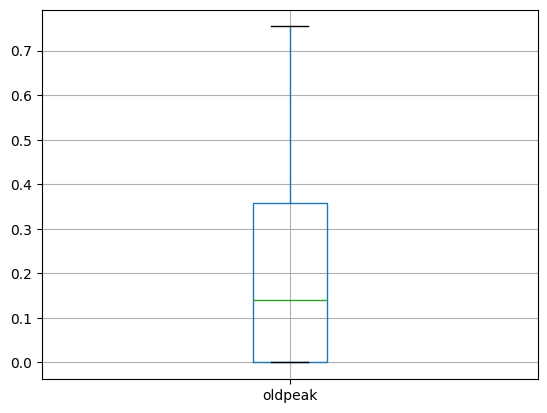

In [88]:
# нарисуем
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.show()

In [89]:
# посмотрим на функцию ошибки
from matplotlib import pyplot as plt  #
plt.plot(np.arange(epochs), Loss, color='green') # рисуем
plt.yscale('log') # логарифмический масштаб для наглядности

## Логистическая регрессия

In [90]:
cols = df.select_dtypes(exclude=['float']).columns

df[cols] = df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

df

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,age,trestbps,chol,thalach,oldpeak
0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,0.0,0.497415,0.303590,0.203825,0.768657,0.167433
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.470279,0.408166,0.165349,0.603105,0.470279
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.743773,0.418950,0.095426,0.358939,0.365157
3,1.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,0.0,0.606845,0.463721,0.160024,0.625375,0.000000
4,0.0,0.0,1.0,1.0,0.0,1.0,3.0,2.0,0.0,0.702638,0.424234,0.392007,0.273059,0.313199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,0.587955,0.408240,0.204039,0.667845,0.000000
1021,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.620610,0.281031,0.289600,0.513482,0.433975
1022,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.569314,0.229158,0.516455,0.544687,0.244866
1023,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.504896,0.174196,0.337256,0.775238,0.000000


In [91]:
X=df.iloc[:,:7]
y=df.iloc[:,8]

In [92]:
X
print(X.dtypes)

sex        float32
cp         float32
fbs        float32
restecg    float32
exang      float32
slope      float32
ca         float32
dtype: object


In [93]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1020    1.0
1021    0.0
1022    0.0
1023    1.0
1024    0.0
Name: target, Length: 1025, dtype: float32

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

In [95]:
#настройка параметров модели
model = LogisticRegression()
y_scor=model.fit(X_train, y_train)
y_score=y_scor.predict(X_test)

In [96]:
print(metrics.classification_report(y_test, y_score))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       241
         1.0       0.84      0.83      0.83       272

    accuracy                           0.83       513
   macro avg       0.83      0.83      0.83       513
weighted avg       0.83      0.83      0.83       513



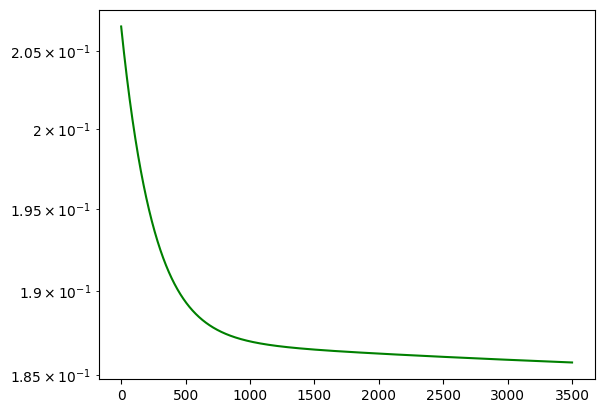

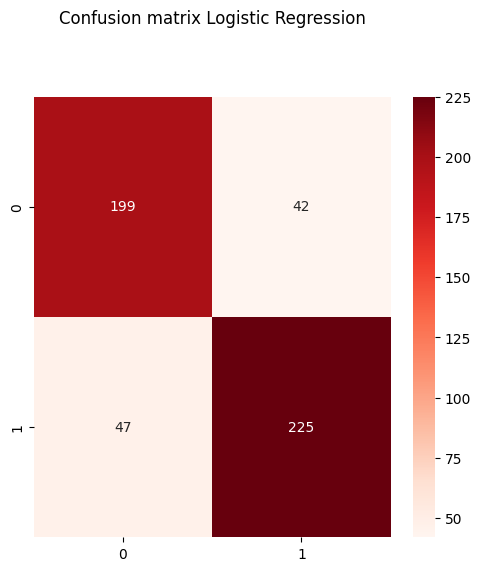

In [97]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

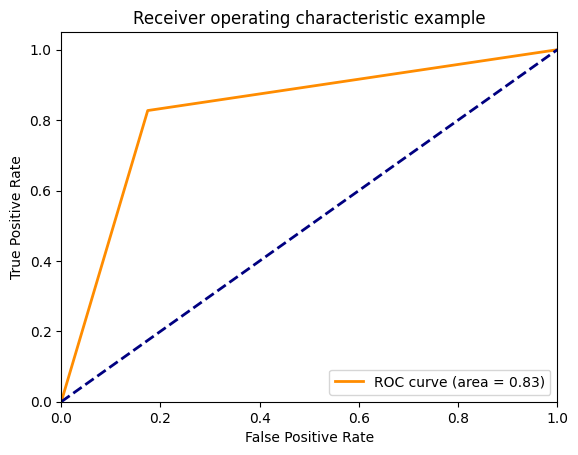

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [99]:
X_cut = X.iloc[:,:4]
X_cut

,sex,cp,fbs,restecg
0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0
...,...,...,...,...
1020,1.0,1.0,0.0,1.0
1021,1.0,0.0,0.0,0.0
1022,1.0,0.0,0.0,0.0
1023,0.0,0.0,0.0,0.0


In [100]:
X = X.iloc[:,0:4]
X

,sex,cp,fbs,restecg
0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0
...,...,...,...,...
1020,1.0,1.0,0.0,1.0
1021,1.0,0.0,0.0,0.0
1022,1.0,0.0,0.0,0.0
1023,0.0,0.0,0.0,0.0


In [101]:
X_cut = X.iloc[:, [0, 3]]
X_cut

,sex,restecg
0,1.0,1.0
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,1.0
...,...,...
1020,1.0,1.0
1021,1.0,0.0
1022,1.0,0.0
1023,0.0,0.0


In [102]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cut, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую
yc_test

807     1.0
27      0.0
77      0.0
406     1.0
886     0.0
       ... 
1013    0.0
521     1.0
929     0.0
619     0.0
1023    1.0
Name: target, Length: 513, dtype: float32

In [103]:
#настройка параметров модели
model = LogisticRegression()
yc_scor=model.fit(Xc_train, yc_train)
yc_score=yc_scor.predict(Xc_test)

In [104]:
print(metrics.classification_report(yc_test, yc_score))

              precision    recall  f1-score   support

         0.0       0.56      0.83      0.67       241
         1.0       0.74      0.43      0.55       272

    accuracy                           0.62       513
   macro avg       0.65      0.63      0.61       513
weighted avg       0.66      0.62      0.60       513



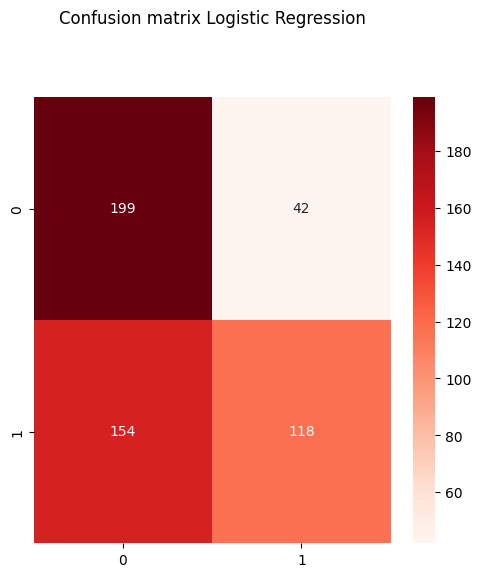

In [105]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(yc_test, yc_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

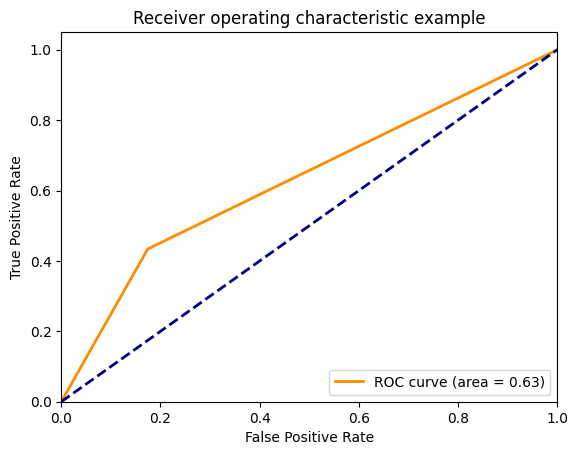

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(yc_test, yc_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()